# Hyperspectral Image Analysis - Getting Started

In [5]:
%%capture
!pip install --upgrade git+git://github.com/abraia/abraia-multiple.git

import os
from dotenv import load_dotenv
load_dotenv()

if not os.getenv('ABRAIA_KEY'):
    #@markdown <a href="https://abraia.me/console/settings" target="_blank">Get your ABRAIA_KEY</a>
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_KEY=$abraia_key

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multiple import Multiple, hsi
 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
 
multiple = Multiple()

OSError: /home/jorge/Projects/public/abraia-multiple/venv/lib/python3.8/site-packages/multiple/cie-cmf_1nm.txt not found.

## Download and read the HSI data

In [4]:
%%capture
#@markdown <a href="https://abraia.me/console/gallery" target="_blank">Upload your hyperspectral data</a>
if not os.path.exists('PaviaU.mat') or not os.path.exists('PaviaU_gt.mat'):
    !wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
    !wget http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
multiple.upload('PaviaU.mat')
multiple.upload('PaviaU_gt.mat')

In [6]:
class_labels = {'1': 'Asphalt',
                '2': 'Meadows',
                '3': 'Gravel',
                '4': 'Trees',
                '5': 'Painted metal sheets',
                '6': 'Bare Soil',
                '7': 'Bitumen',
                '8': 'Self Blocking Bricks',
                '9': 'Shadows'}

img = multiple.load_image('PaviaU.mat')
gt = multiple.load_image('PaviaU_gt.mat')

img.shape, gt.shape

((610, 340, 103), (610, 340))

## Basic visualization of HSI data

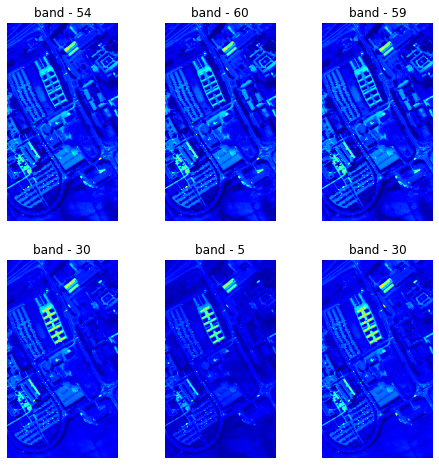

In [7]:
imgs, indexes = hsi.random(img)
fig, ax = plt.subplots(2, 3)
ax = ax.reshape(-1)
for i, im in enumerate(imgs):
    ax[i].imshow(im, cmap='jet')
    ax[i].axis('off')

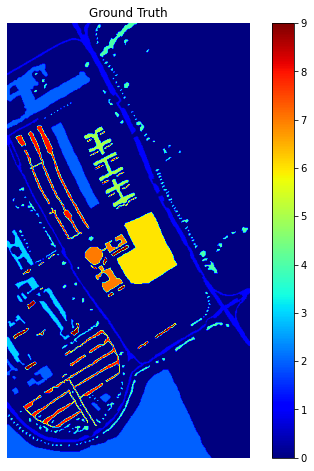

In [8]:
plt.title('Ground Truth')
plt.imshow(gt, cmap='jet')
plt.axis('off')

## Dimensionality reduction using PCA

The dimensions of the data are reduced from 103 to 3 as it makes easier to understands patterns in the data.

In [ ]:
img = hsi.principal_components(img)

plt.title('Principal components')
plt.imshow(img)
plt.axis('off')